# Stock Returns Prediction with Supervised Learning Algorithms
***

In [85]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [86]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [87]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [88]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('Stock data.csv', encoding='cp1252', index_col=0)

In [89]:
stockdata.head()

,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
0,A,"Agilent Technologies, Inc.",Agilent Technologies Inc. Common Stock,United States,1999.0,Industrials,0.152928,IQ154924,NYSE:A,United States,...,2493.00000,845.00000,655.0000,2760.00000,1684.00000,412.00000,0.0,408.00000,-14.00000,1074.00000
1,AA,Alcoa Corporation,Alcoa Corporation Common Stock,NaN,2016.0,Industrials,-0.053241,IQ369991357,NYSE:AA,United States,...,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
2,AACG,ATA Creativity Global,ATA Creativity Global American Depositary Shares,China,2008.0,Consumer Discretionary,0.396683,IQ39920439,NasdaqGM:AACG,China,...,45.43238,3.07086,3.4272,-13.47624,48.40566,-45.43238,0.0,4.61462,-5.12896,-3.17418
3,AAIC,Arlington Asset Investment Corp.,Arlington Asset Investment Corp Class A (new),United States,NaN,Real Estate,0.038440,IQ20323,NYSE:AAIC,United States,...,10.12300,0.00000,0.0000,-1364.47600,150.01300,133.56400,0.0,-77.61100,753.33100,-244.53000
4,AAL,American Airlines Group Inc.,American Airlines Group Inc. Common Stock,United States,NaN,Consumer Discretionary,0.204823,IQ168569,NasdaqGS:AAL,United States,...,4399.00000,14837.00000,0.0000,-5136.00000,-4477.00000,7298.00000,0.0,930.00000,-2723.00000,-38.00000


In [90]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 0 to 2949
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2950 non-null   object 
 1   longName                        2950 non-null   object 
 2   Name                            2950 non-null   object 
 3   Country                         2912 non-null   object 
 4   IPO Year                        1126 non-null   float64
 5   Sector                          2776 non-null   object 
 6   Effective annual return         2950 non-null   float64
 7   CIQ ID                          2950 non-null   object 
 8   Ticker                          2840 non-null   object 
 9   Country.1                       2950 non-null   object 
 10  Industry                        2945 non-null   object 
 11  Short Business Description      2941 non-null   object 
 12  IQ_TOTAL_REV                    29

Fundamental data were downloaded from Capital IQ to be used as features to predict effective annual return (from 4-Jan-2010 to 2-Jan-2020). These fundamental data are for financial year ending 2009 updated as at 01-Apr-2023 (date of retrieval of data), and are in USD (for monetary figures - using historical exchange rates) or % (for ratios). <br> <br>
The fundamental data (29 metrics in total) obtained from Capital IQ have the following definitions: <br>
**IQ_TOTAL_REV**: Revenues + Other Revenues, Total	<br>
**IQ_RETURN_ASSETS**: EBIT * (1-0.375) / Average Total Assets	<br>
**IQ_RETURN_EQUITY**:	Earnings from Continuing Operations / Average Total Equity<br>
**IQ_GROSS_MARGIN**: Gross Profit / Total Revenues <br>
**IQ_EBITDA_MARGIN**: EBITDA / Total Revenues	<br>
**IQ_NI_MARGIN**: Net Income / Total Revenues	<br>
**IQ_AUDITOR_OPINION**: Auditor Opinion	<br>
**IQ_ASSET_TURNS**: Total Revenues / Average Total Assets	<br>
**IQ_CURRENT_RATIO**: Total Current Assets / Total Current Liabilities	<br>
**IQ_DAYS_SALES_OUT**: Average Accounts Receivable / Revenues * 360	<br>
**IQ_DAYS_INVENTORY_OUT**: Average Inventory / Cost of Goods Sold * 360	<br>
**IQ_DAYS_PAYABLE_OUT**: Average Accounts Payable / (Cost of Goods Sold - Beginning Inventory + Ending Inventory) * Number of Days in the Period	<br>
**IQ_TOTAL_DEBT_EQUITY**: Total Debt / Total Equity	<br>
**IQ_TOTAL_REV_1YR_ANN_GROWTH**: Total Revenues (t) / Total Revenues (t-1) - 1	<br>
**IQ_NI_1YR_ANN_GROWTH**: Net Income (t) / Net Income (t-1) -1	<br>
**IQ_CFO_1YR_ANN_GROWTH**: Cash from Operations (t) / Cash from Operations (t-1) -1	<br>
**IQ_TOTAL_ASSETS_1YR_ANN_GROWTH**: Total Assets (t) / Total Assets (t-1) -1	<br>
**IQ_EBITDA**: EBITDA	<br>
**IQ_PAYOUT_RATIO**: (Common Dividends Paid + Preferred Dividends Paid) / Net Income	<br>
**IQ_CASH_ST_INVEST**: Cash and Equivalents + Short Term Investments + Trading Asset Securities	<br>
**IQ_NPPE**: Gross Property Plant and Equipment + Accumulated Depreciation	<br>
**IQ_GW**: Goodwill	<br>
**IQ_RE**: Retained Earnings	<br>
**IQ_TBV**: Book Value of Common Equity - Goodwill = Other Intangibles - Fin. Div. Goodwill - Fin. Div. Other Intangibles	<br>
**IQ_NET_DEBT**: Total Debt - Total Cash and Short Term Investments - Long Term Marketable Securities	<br>
**IQ_CONTINGENT_LIABILITIES**: Contingent Liabilites <br>
**IQ_CASH_OPER**: Cash from Operations <br>
**IQ_CASH_INVEST**: Cash from Investing <br>
**IQ_NET_CHANGE**: Cash from Operations + Cash from Investing + Cash from Financing + Foreign Exchange Rate Adjustments + Misc. Cash Flow Adjustments

In [91]:
stockdata[list(stockdata.columns.values)].nunique()

Symbol                            2950
longName                          2931
Name                              2947
Country                             46
IPO Year                            59
Sector                              12
Effective annual return           2950
CIQ ID                            2840
Ticker                            2731
Country.1                           48
Industry                           157
Short Business Description        2831
IQ_TOTAL_REV                      2552
IQ_RETURN_ASSETS                  2545
IQ_RETURN_EQUITY                  2484
IQ_GROSS_MARGIN                   1985
IQ_EBITDA_MARGIN                  1943
IQ_NI_MARGIN                      2442
IQ_AUDITOR_OPINION                   5
IQ_ASSET_TURNS                    2281
IQ_CURRENT_RATIO                  2378
IQ_DAYS_SALES_OUT                 1864
IQ_DAYS_INVENTORY_OUT             1417
IQ_DAYS_PAYABLE_OUT               1849
IQ_TOTAL_DEBT_EQUITY              1827
IQ_TOTAL_REV_1YR_ANN_GROW

In [92]:
# We first investigate duplicate values for 'Name' as these were obtained from NASDAQ Stock Screener at the outset.
stockdata[stockdata['Name'].duplicated(keep=False)]

,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
576,CMU,MFS High Yield Municipal Trust,MFS Municipal Income Trust Common Stock,United States,1987.0,Finance,0.073879,IQ3590572,NYSE:CMU,United States,...,2.57682,0.000,0.000,-67.01807,116.86997,-2.57682,0.0,0.000,0.000,0.000
1681,MFM,MFS Municipal Income Trust,MFS Municipal Income Trust Common Stock,United States,1986.0,Finance,0.066933,IQ3590567,NYSE:MFM,United States,...,0.00000,0.000,0.000,-51.56183,264.54245,10.75634,0.0,0.000,0.000,0.000
2710,UBA,Urstadt Biddle Properties Inc.,Urstadt Biddle Properties Inc. Common Stock,United States,NaN,Real Estate,0.102276,IQ276658,NYSE:UBA,United States,...,10.34000,460.768,0.000,0.00000,212.33100,106.07700,0.0,42.611,-2.636,8.676
2713,UBP,Urstadt Biddle Properties Inc.,Urstadt Biddle Properties Inc. Common Stock,United States,NaN,Real Estate,0.088217,IQ276658,NYSE:UBA,United States,...,10.34000,460.768,0.000,0.00000,212.33100,106.07700,0.0,42.611,-2.636,8.676
2878,WLY,"John Wiley & Sons, Inc.",John Wiley & Sons Inc. Common Stock,United States,NaN,Consumer Discretionary,0.014950,IQ314242,NYSE:WLY,United States,...,102.82800,141.196,589.993,892.54200,-995.85200,779.27200,0.0,256.009,-116.389,43.517
2879,WLYB,"John Wiley & Sons, Inc.",John Wiley & Sons Inc. Common Stock,United States,NaN,Consumer Discretionary,0.015548,IQ314242,NYSE:WLY,United States,...,102.82800,141.196,589.993,892.54200,-995.85200,779.27200,0.0,256.009,-116.389,43.517


In [93]:
# A quick search on Capital IQ for NYSE:UBP and NYSE:WLYB revealed no results. Therefore, stocks UBP and WLYB are dropped.
stockdata = stockdata.drop([2713, 2879], axis=0)

In [94]:
stockdata[list(stockdata.columns.values)].nunique()

Symbol                            2948
longName                          2931
Name                              2947
Country                             46
IPO Year                            59
Sector                              12
Effective annual return           2948
CIQ ID                            2840
Ticker                            2731
Country.1                           48
Industry                           157
Short Business Description        2831
IQ_TOTAL_REV                      2552
IQ_RETURN_ASSETS                  2545
IQ_RETURN_EQUITY                  2484
IQ_GROSS_MARGIN                   1985
IQ_EBITDA_MARGIN                  1943
IQ_NI_MARGIN                      2442
IQ_AUDITOR_OPINION                   5
IQ_ASSET_TURNS                    2281
IQ_CURRENT_RATIO                  2378
IQ_DAYS_SALES_OUT                 1864
IQ_DAYS_INVENTORY_OUT             1417
IQ_DAYS_PAYABLE_OUT               1849
IQ_TOTAL_DEBT_EQUITY              1827
IQ_TOTAL_REV_1YR_ANN_GROW

In [95]:
# We then investigate duplicate values for 'longName', which were downloaded from yahooquery using 'Symbol'.
stockdata[stockdata['longName'].duplicated(keep=False)]

,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
129,AMOV,"AmÃ©rica MÃ³vil, S.A.B. de C.V.",America Movil S.A.B. de C.V. Class A American ...,Mexico,NaN,Telecommunications,-0.018209,IQ340272,NasdaqGS:AAWW,United States,...,636.33800,593.11200,0.00000,430.8560,849.62300,-70.8280,0.000,214.57300,-0.74500,216.35500
139,AMX,"AmÃ©rica MÃ³vil, S.A.B. de C.V.",America Movil S.A.B. de C.V. American Deposito...,Mexico,NaN,Telecommunications,-0.021467,IQ340272,NasdaqGS:AAWW,United States,...,636.33800,593.11200,0.00000,430.8560,849.62300,-70.8280,0.000,214.57300,-0.74500,216.35500
306,BELFA,Bel Fuse Inc.,Bel Fuse Inc. Class A Common Stock,United States,NaN,NaN,-0.004471,IQ254235,NasdaqGS:BELF.A,United States,...,124.23300,35.94300,1.95700,185.0140,206.42400,-124.2330,0.000,29.15800,23.33000,49.27600
307,BELFB,Bel Fuse Inc.,Bel Fuse Inc. Class B Common Stock,United States,NaN,NaN,0.006252,IQ254235,NasdaqGS:BELF.A,United States,...,124.23300,35.94300,1.95700,185.0140,206.42400,-124.2330,0.000,29.15800,23.33000,49.27600
470,CCL,Carnival Corporation & plc,Carnival Corporation Common Stock,United States,1987.0,NaN,0.078918,IQ258823,NYSE:CCL,United States,...,538.00000,29870.00000,3451.00000,15561.0000,17242.00000,9509.0000,0.000,3342.00000,-3384.00000,-112.00000
490,CENT,Central Garden & Pet Company,Central Garden & Pet Company Common Stock,United States,1993.0,NaN,0.110951,IQ325333,NasdaqGS:CENT,United States,...,85.66800,164.73400,207.74900,12.0440,233.97000,322.4170,0.000,221.63800,-20.54200,58.73900
491,CENTA,Central Garden & Pet Company,Central Garden & Pet Company Class A Common St...,United States,NaN,NaN,0.111815,IQ325333,NasdaqGS:CENT,United States,...,85.66800,164.73400,207.74900,12.0440,233.97000,322.4170,0.000,221.63800,-20.54200,58.73900
680,CUK,Carnival Corporation & plc,Carnival Plc ADS ADS,United States,NaN,NaN,0.063639,IQ258823,NYSE:CCL,United States,...,538.00000,29870.00000,3451.00000,15561.0000,17242.00000,9509.0000,0.000,3342.00000,-3384.00000,-112.00000
711,CYCC,"Cyclacel Pharmaceuticals, Inc.",Cyclacel Pharmaceuticals Inc. Common Stock,United States,NaN,Health Care,-0.385565,IQ125004,NasdaqCM:CYCC,United States,...,11.49300,0.90100,0.00000,-222.2850,5.87000,-11.4930,0.000,-14.88600,1.55900,-12.72700
712,CYCCP,"Cyclacel Pharmaceuticals, Inc.",Cyclacel Pharmaceuticals Inc. 6% Convertible P...,United States,NaN,Health Care,0.159231,IQ125004,NasdaqCM:CYCC,United States,...,11.49300,0.90100,0.00000,-222.2850,5.87000,-11.4930,0.000,-14.88600,1.55900,-12.72700


In [96]:
stockdata[stockdata['longName'].duplicated(keep=False)].iplot(kind='bar', x='Symbol', y='Effective annual return')

Taking a glance at the 'Name' column in the DataFrame shows that the stocks from the NASDAQ Stock Screener contain different classeses of stock eg. Class A, Class B, ADS. <br>
As these different classes of stock of the same company will have the same company performance and hence fundamental data, we will be dropping duplicate entries. <br>
Generally, different companies designate classes of shares differently i.e. class A stock might be for public investors for one company but be for executives/controlling shareholders for another company. <br>
Based on the chart above, the effective annual returns for different classes of stock are fairly similar for the duplicate entries, except for CYCC (Cyclacel Pharmaceuticals Inc. Common Stock) and CYCCP (Cyclacel Pharmaceuticals Inc. 6% Convertible Preferred Stock). In this case, CYCCP should be dropped as we are analysing stock returns, while convertible preferred stock have features of bonds.<br>
For simplicity, we will drop the **subsequent entries** that are duplicates, leaving the first entry from the NASDAQ Stock Screener in our project.

In [97]:
stockdata = stockdata.drop_duplicates(subset=['longName'], keep='first')

In [98]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2931 entries, 0 to 2949
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2931 non-null   object 
 1   longName                        2931 non-null   object 
 2   Name                            2931 non-null   object 
 3   Country                         2893 non-null   object 
 4   IPO Year                        1124 non-null   float64
 5   Sector                          2760 non-null   object 
 6   Effective annual return         2931 non-null   float64
 7   CIQ ID                          2931 non-null   object 
 8   Ticker                          2821 non-null   object 
 9   Country.1                       2931 non-null   object 
 10  Industry                        2926 non-null   object 
 11  Short Business Description      2922 non-null   object 
 12  IQ_TOTAL_REV                    29

In [99]:
stockdata[list(stockdata.columns.values)].nunique()

Symbol                            2931
longName                          2931
Name                              2930
Country                             46
IPO Year                            59
Sector                              12
Effective annual return           2931
CIQ ID                            2840
Ticker                            2731
Country.1                           48
Industry                           157
Short Business Description        2831
IQ_TOTAL_REV                      2552
IQ_RETURN_ASSETS                  2545
IQ_RETURN_EQUITY                  2484
IQ_GROSS_MARGIN                   1985
IQ_EBITDA_MARGIN                  1943
IQ_NI_MARGIN                      2442
IQ_AUDITOR_OPINION                   5
IQ_ASSET_TURNS                    2281
IQ_CURRENT_RATIO                  2378
IQ_DAYS_SALES_OUT                 1864
IQ_DAYS_INVENTORY_OUT             1417
IQ_DAYS_PAYABLE_OUT               1849
IQ_TOTAL_DEBT_EQUITY              1827
IQ_TOTAL_REV_1YR_ANN_GROW

In [100]:
# Now we investigate duplicate values for CIQ ID, which was ultimately used to obtain fundamental data from S&P Capital IQ.
stockdata[stockdata['CIQ ID'].duplicated(keep=False)]

,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
10,AAWW,"Atlas Air Worldwide Holdings, Inc.",Atlas Air Worldwide Holdings NEW Common Stock,United States,NaN,Consumer Discretionary,-0.031524,IQ340272,NasdaqGS:AAWW,United States,...,636.338,593.112,0.0,430.856,849.623,-70.828,0.0,214.573,-0.745,216.355
56,AEF,Abrdn Emerging Markets Equity Income Fund Inc,abrdn Emerging Markets Equity Income Fund Inc....,United States,NaN,Finance,0.025474,IQ340272,NasdaqGS:AAWW,United States,...,636.338,593.112,0.0,430.856,849.623,-70.828,0.0,214.573,-0.745,216.355
127,AMNB,American National Bankshares Inc.,American National Bankshares Inc. Common Stock,United States,NaN,Finance,0.098120,IQ340272,NasdaqGS:AAWW,United States,...,636.338,593.112,0.0,430.856,849.623,-70.828,0.0,214.573,-0.745,216.355
129,AMOV,"AmÃ©rica MÃ³vil, S.A.B. de C.V.",America Movil S.A.B. de C.V. Class A American ...,Mexico,NaN,Telecommunications,-0.018209,IQ340272,NasdaqGS:AAWW,United States,...,636.338,593.112,0.0,430.856,849.623,-70.828,0.0,214.573,-0.745,216.355
203,ATCO,Atlas Corp.,Atlas Corp. Common Shares,United Kingdom,NaN,Consumer Discretionary,0.108580,IQ253891410,NasdaqGS:TEAM,Australia,...,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,VPV,Invesco Pennsylvania Value Municipal Income Trust,Invesco Pennsylvania Value Municipal Income Tr...,United States,NaN,Finance,0.065774,IQ340272,NasdaqGS:AAWW,United States,...,636.338,593.112,0.0,430.856,849.623,-70.828,0.0,214.573,-0.745,216.355
2829,VTN,Invesco Trust for Investment Grade New York Mu...,Invesco Trust for Investment Grade New York Mu...,United States,NaN,Finance,0.055557,IQ340272,NasdaqGS:AAWW,United States,...,636.338,593.112,0.0,430.856,849.623,-70.828,0.0,214.573,-0.745,216.355
2881,WMB,"The Williams Companies, Inc.",Williams Companies Inc. (The) Common Stock,United States,NaN,Utilities,0.078140,IQ314400,NYSE:WSM,United States,...,148.822,930.716,0.0,725.052,1147.984,-123.861,0.0,230.163,-144.039,29.872
2900,WSM,"Williams-Sonoma, Inc.",Williams-Sonoma Inc. Common Stock (DE),United States,NaN,Consumer Discretionary,0.160807,IQ314400,NYSE:WSM,United States,...,148.822,930.716,0.0,725.052,1147.984,-123.861,0.0,230.163,-144.039,29.872


The duplicate values arose due to two main reasons:
- Some of the longName downloaded from yahooquery contains symbols. For example, "America Movil" showed as "AmÃ©rica MÃ³vil". The SPCIQ Identifier Converter template used to retrieve CIQ ID based on longName therefore could not identify the CIQ ID correctly.
- The longName are not duplicates but are very similar, for example, "First Bancorp" and "First Bancorp", "John Hancock Preferred Income Fund II" and "John Hancock Preferred Income Fund", resulting in the same CIQ ID being obtained.
<br><br>For simplicity, as there are more than a hundred total entries with duplicate CIQ ID, we will drop the **subsequent entries** that are duplicates, leaving the first entry from in our project.

In [101]:
stockdata = stockdata.drop_duplicates(subset=['CIQ ID'], keep='first')

In [102]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 2949
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2840 non-null   object 
 1   longName                        2840 non-null   object 
 2   Name                            2840 non-null   object 
 3   Country                         2803 non-null   object 
 4   IPO Year                        1088 non-null   float64
 5   Sector                          2675 non-null   object 
 6   Effective annual return         2840 non-null   float64
 7   CIQ ID                          2840 non-null   object 
 8   Ticker                          2731 non-null   object 
 9   Country.1                       2840 non-null   object 
 10  Industry                        2835 non-null   object 
 11  Short Business Description      2831 non-null   object 
 12  IQ_TOTAL_REV                    28

In [103]:
stockdata[list(stockdata.columns.values)].nunique()

Symbol                            2840
longName                          2840
Name                              2839
Country                             46
IPO Year                            59
Sector                              12
Effective annual return           2840
CIQ ID                            2840
Ticker                            2731
Country.1                           48
Industry                           157
Short Business Description        2831
IQ_TOTAL_REV                      2552
IQ_RETURN_ASSETS                  2545
IQ_RETURN_EQUITY                  2484
IQ_GROSS_MARGIN                   1985
IQ_EBITDA_MARGIN                  1943
IQ_NI_MARGIN                      2442
IQ_AUDITOR_OPINION                   5
IQ_ASSET_TURNS                    2281
IQ_CURRENT_RATIO                  2378
IQ_DAYS_SALES_OUT                 1864
IQ_DAYS_INVENTORY_OUT             1417
IQ_DAYS_PAYABLE_OUT               1849
IQ_TOTAL_DEBT_EQUITY              1827
IQ_TOTAL_REV_1YR_ANN_GROW

In [104]:
# 'Ticker' are all unique, except for 109 null values. 
# To perform a brief check whether tickers are correct, we return all entries where 'Ticker' is non-null and where 'Symbol' is not found as a substring in 'Ticker'.
stockdata[stockdata['Ticker'].notnull()][~stockdata.apply(lambda x: str(x.Symbol) in str(x.Ticker), axis=1)]

C:\Users\User\AppData\Local\Temp\ipykernel_11408\2670335165.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
9,AAU,Almaden Minerals Ltd.,Almaden Minerals Ltd. Common Shares,Canada,2015.0,NaN,-0.063628,IQ5512625,TSX:AMM,Canada,...,13.27556,8.97813,0.00000,-29.31327,24.00459,-13.27556,0.00000,-1.08055,-0.71084,0.78637
57,AEG,Aegon N.V.,AEGON N.V. Common Stock,Netherlands,NaN,Finance,0.005219,IQ247906,ENXTAM:AGN,Netherlands,...,32520.24363,309.56646,1031.88821,11817.98638,22219.99283,11709.06485,795.41383,-10039.41239,-465.78287,-7872.44715
73,AG,First Majestic Silver Corp.,First Majestic Silver Corp. Ordinary Shares (C...,Canada,NaN,NaN,0.115395,IQ3110160,TSX:FR,Canada,...,6.19786,216.89545,0.00000,-31.66268,189.90033,1.02671,0.00000,6.39907,-47.38289,-11.01129
101,ALCO,"Alico, Inc.",Alico Inc. Common Stock,United States,NaN,NaN,0.030012,IQ877482,BVL:ALICORC1,Peru,...,40.04292,365.96712,79.51506,160.11665,398.59571,168.12323,0.00000,208.43856,-30.83489,21.11353
135,AMSWA,"American Software, Inc.",American Software Inc. Class A Common Stock,United States,NaN,Technology,0.150182,IQ250510,NasdaqGS:AMSW.A,United States,...,54.00000,7.18900,11.70900,11.62500,62.32100,-54.00000,0.00000,7.79900,-19.44900,-21.60700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,VLGEA,"Village Super Market, Inc.",Village Super Market Inc. Class A Common Stock,United States,NaN,Consumer Staples,0.023496,IQ312085,NasdaqGS:VLGE.A,United States,...,54.96600,162.26100,10.60500,171.22900,176.79300,-17.56100,0.00000,47.86300,-28.17100,7.07700
2859,WF,Woori Financial Group Inc.,Woori Financial Group Inc. American Depositary...,South Korea,NaN,Finance,-0.011942,IQ3017710,KOSE:A316140,South Korea,...,33921.77313,2454.85789,243.46263,7158.88262,11398.90183,34061.13150,308.55417,-2666.17317,4116.80014,6057.25069
2872,WIT,Wipro Limited,Wipro Limited Common Stock,India,NaN,Technology,-0.037234,IQ598611,BSE:507685,India,...,1393.19988,982.31422,1107.56451,2498.41682,1726.31950,-270.85943,163.83740,712.14526,-477.07163,183.86088
2881,WMB,"The Williams Companies, Inc.",Williams Companies Inc. (The) Common Stock,United States,NaN,Utilities,0.078140,IQ314400,NYSE:WSM,United States,...,148.82200,930.71600,0.00000,725.05200,1147.98400,-123.86100,0.00000,230.16300,-144.03900,29.87200


A brief google search shows that the tickers obtained from the SPCIQ Identifier Converter are largely accurate.

In [105]:
# We will now decide whether to keep the 'Country' feature obtained from Nasdaq Stock Screener or the 'Country.1' feature obtained from S&P Capital IQ.
stockdata[stockdata['Country']!=stockdata['Country.1']]

,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
1,AA,Alcoa Corporation,Alcoa Corporation Common Stock,NaN,2016.0,Industrials,-0.053241,IQ369991357,NYSE:AA,United States,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
16,ABEV,Ambev S.A.,Ambev S.A. American Depositary Shares (Each re...,NaN,2013.0,Consumer Staples,0.063421,IQ134386019,BOVESPA:ABEV3,Brazil,...,13.71645,0.00000,0.00000,-76.76531,61.95974,1112.94104,0.00000,24.24524,-1147.58947,-5.05506
23,ABUS,Arbutus Biopharma Corporation,Arbutus Biopharma Corporation Common Stock,Canada,NaN,Health Care,-0.043778,IQ34160168,NasdaqGS:ABUS,United States,...,23.29140,3.17045,0.00000,-225.77115,21.44394,-23.29140,0.00000,-5.28281,3.84821,-1.73805
30,ACHV,"Achieve Life Sciences, Inc.",Achieve Life Sciences Inc. Common Shares,United States,NaN,Health Care,-0.569933,IQ415241078,NasdaqCM:ACHV,Canada,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
66,AER,AerCap Holdings N.V.,AerCap Holdings N.V. Ordinary Shares,Netherlands,2006.0,Consumer Discretionary,0.210886,IQ896178,NYSE:AER,Ireland,...,182.61700,11.24200,6.77600,664.17700,1219.83400,4664.04700,0.00000,425.94500,-1591.61900,-10.94600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,VALE,Vale S.A.,VALE S.A. American Depositary Shares Each Rep...,Brazil,NaN,Basic Materials,-0.034691,IQ688262,ENXTPA:FR,France,...,1232.53314,2386.24149,1642.42207,0.00000,-126.11967,1120.74525,2.86636,858.47367,-712.28950,418.48800
2851,WDS,Woodside Energy Group Ltd,Woodside Energy Group Limited American Deposit...,NaN,2022.0,Energy,-0.058179,IQ873963,ASX:WDS,Australia,...,1207.00000,15097.00000,0.00000,4339.00000,8812.00000,3732.00000,3.00000,1483.00000,-4708.00000,1105.00000
2862,WFG,West Fraser Timber Co. Ltd.,West Fraser Timber Co. Ltd Common stock,NaN,2021.0,NaN,0.107072,IQ643621,TSX:WFG,Canada,...,11.45585,1040.57279,251.74224,1029.40334,706.34845,461.00239,0.00000,101.09785,-11.26492,-12.88783
2892,WPP,WPP plc,WPP plc American Depositary Shares,Ireland,NaN,NaN,0.073250,IQ312546,LSE:WPP,United Kingdom,...,2692.35118,1099.26500,14049.75365,16071.72280,-7760.60092,4265.24513,0.00000,1322.67184,-585.57467,-601.08230


We know that there are 2840-2803=37 null values for 'Country' but no null values for 'Country.1', therefore a total of 147-37=110 entries have 'Country' not matching 'Country.1'.

In [106]:
stockdata[stockdata['Country']!=stockdata['Country.1']][stockdata['Country'].notna()]

C:\Users\User\AppData\Local\Temp\ipykernel_11408\4265638683.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Symbol,longName,Name,Country,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
23,ABUS,Arbutus Biopharma Corporation,Arbutus Biopharma Corporation Common Stock,Canada,NaN,Health Care,-0.043778,IQ34160168,NasdaqGS:ABUS,United States,...,23.29140,3.17045,0.00000,-225.77115,21.44394,-23.29140,0.00000,-5.28281,3.84821,-1.73805
30,ACHV,"Achieve Life Sciences, Inc.",Achieve Life Sciences Inc. Common Shares,United States,NaN,Health Care,-0.569933,IQ415241078,NasdaqCM:ACHV,Canada,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
66,AER,AerCap Holdings N.V.,AerCap Holdings N.V. Ordinary Shares,Netherlands,2006.0,Consumer Discretionary,0.210886,IQ896178,NYSE:AER,Ireland,...,182.61700,11.24200,6.77600,664.17700,1219.83400,4664.04700,0.00000,425.94500,-1591.61900,-10.94600
69,AEZS,Aeterna Zentaris Inc.,Aeterna Zentaris Inc. Common Stock,Canada,NaN,Health Care,-0.468808,IQ416430,TSX:AEZS,United States,...,38.10000,4.35800,10.24600,-127.53800,-18.05400,-37.90000,0.00000,-24.13800,-1.09700,-11.12600
75,AGD,Abrdn Global Dynamic Dividend Fund,abrdn Global Dynamic Dividend Fund Common Shar...,United States,2006.0,Finance,0.028489,IQ27246897,NYSE:AGD,United Kingdom,...,1.81612,0.00000,0.00000,-291.71846,172.91476,10.27388,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,UNTY,"Unity Bancorp, Inc.",Unity Bancorp Inc. Common Stock,United States,NaN,Finance,0.208298,IQ25285425,NGSE:UNITYBNK,Nigeria,...,456.25567,105.09959,114.38822,-143.32942,-68.11078,-456.25567,112.39615,-149.90523,-7.72707,-808.26465
2753,URG,Ur-Energy Inc.,Ur Energy Inc Common Shares (Canada),Canada,NaN,NaN,-0.032113,IQ24905528,TSX:URE,United States,...,41.44981,30.73473,0.00000,-74.05585,76.25178,-41.44981,0.00000,-16.19408,25.91735,7.16582
2780,VALE,Vale S.A.,VALE S.A. American Depositary Shares Each Rep...,Brazil,NaN,Basic Materials,-0.034691,IQ688262,ENXTPA:FR,France,...,1232.53314,2386.24149,1642.42207,0.00000,-126.11967,1120.74525,2.86636,858.47367,-712.28950,418.48800
2892,WPP,WPP plc,WPP plc American Depositary Shares,Ireland,NaN,NaN,0.073250,IQ312546,LSE:WPP,United Kingdom,...,2692.35118,1099.26500,14049.75365,16071.72280,-7760.60092,4265.24513,0.00000,1322.67184,-585.57467,-601.08230


In [107]:
# It makes sense to use 'Country.1' obtained from S&P Capital IQ, as the features to be used in the machine learning models are obtained from S&P Capital IQ as well. 
stockdata.drop('Country', axis=1, inplace=True)

In [108]:
# To drop 'Industry' feature obtained from Capital IQ as there are too many unique values. Furthermore, similar information is captured by 'Sector' feature.
stockdata.drop('Industry', axis=1, inplace=True)

In [109]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2840 non-null   object 
 1   longName                        2840 non-null   object 
 2   Name                            2840 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2675 non-null   object 
 5   Effective annual return         2840 non-null   float64
 6   CIQ ID                          2840 non-null   object 
 7   Ticker                          2731 non-null   object 
 8   Country.1                       2840 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2840 non-null   float64
 11  IQ_RETURN_ASSETS                2840 non-null   float64
 12  IQ_RETURN_EQUITY                28

In [110]:
stockdata.isna().sum()

Symbol                               0
longName                             0
Name                                 0
IPO Year                          1752
Sector                             165
Effective annual return              0
CIQ ID                               0
Ticker                             109
Country.1                            0
Short Business Description           9
IQ_TOTAL_REV                         0
IQ_RETURN_ASSETS                     0
IQ_RETURN_EQUITY                     0
IQ_GROSS_MARGIN                      0
IQ_EBITDA_MARGIN                   278
IQ_NI_MARGIN                         0
IQ_AUDITOR_OPINION                   0
IQ_ASSET_TURNS                       0
IQ_CURRENT_RATIO                     0
IQ_DAYS_SALES_OUT                    0
IQ_DAYS_INVENTORY_OUT                0
IQ_DAYS_PAYABLE_OUT                  0
IQ_TOTAL_DEBT_EQUITY                 0
IQ_TOTAL_REV_1YR_ANN_GROWTH          0
IQ_NI_1YR_ANN_GROWTH                 0
IQ_CFO_1YR_ANN_GROWTH    

<AxesSubplot:>

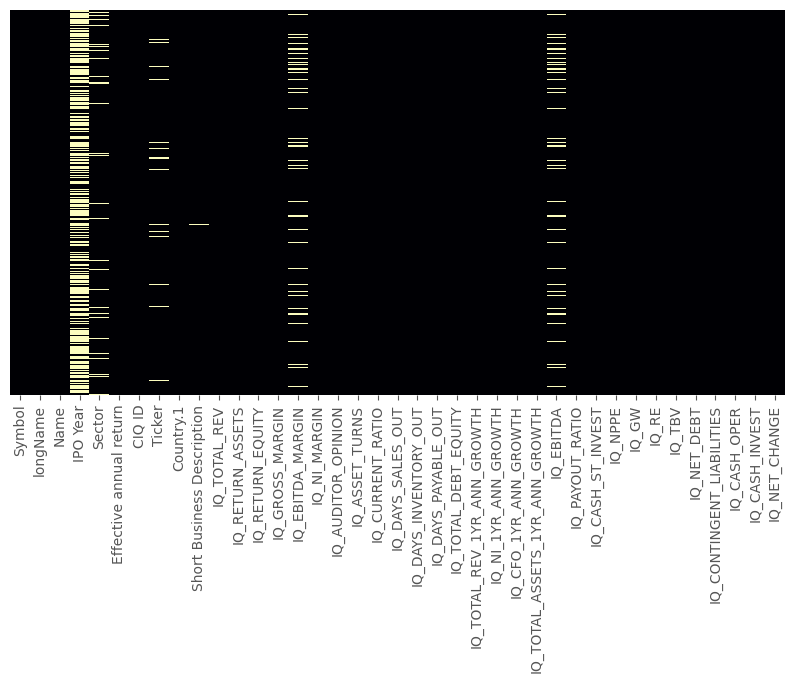

In [111]:
plt.figure(figsize=(10,5))
sns.heatmap(stockdata.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [112]:
# Out of the 29 fundamental data features (IQ_TOTAL_REV to IQ_NET_CHANGE), 11 features have only 1 missing value. 
stockdata[stockdata['IQ_PAYOUT_RATIO'].isna()]

,Symbol,longName,Name,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,Short Business Description,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
2103,PFIS,Peoples Financial Services Corp.,Peoples Financial Services Corp. Common Stock,NaN,Finance,0.142025,IQ2667878,^DJUSFV,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
stockdata[stockdata['IQ_PAYOUT_RATIO'].isna()].isna().transpose()

,2103
Symbol,False
longName,False
Name,False
IPO Year,True
Sector,False
Effective annual return,False
CIQ ID,False
Ticker,False
Country.1,False
Short Business Description,True


In [114]:
# Since Peoples Financial Services Corp. does not have values for the last 11 features, it will be dropped from the DataFrame for convenience's sake.
stockdata = stockdata.drop(index=2103, axis=0)

In [115]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2839 non-null   object 
 1   longName                        2839 non-null   object 
 2   Name                            2839 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2674 non-null   object 
 5   Effective annual return         2839 non-null   float64
 6   CIQ ID                          2839 non-null   object 
 7   Ticker                          2730 non-null   object 
 8   Country.1                       2839 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2839 non-null   float64
 11  IQ_RETURN_ASSETS                2839 non-null   float64
 12  IQ_RETURN_EQUITY                28

In [116]:
stockdata.isna().sum()

Symbol                               0
longName                             0
Name                                 0
IPO Year                          1751
Sector                             165
Effective annual return              0
CIQ ID                               0
Ticker                             109
Country.1                            0
Short Business Description           8
IQ_TOTAL_REV                         0
IQ_RETURN_ASSETS                     0
IQ_RETURN_EQUITY                     0
IQ_GROSS_MARGIN                      0
IQ_EBITDA_MARGIN                   278
IQ_NI_MARGIN                         0
IQ_AUDITOR_OPINION                   0
IQ_ASSET_TURNS                       0
IQ_CURRENT_RATIO                     0
IQ_DAYS_SALES_OUT                    0
IQ_DAYS_INVENTORY_OUT                0
IQ_DAYS_PAYABLE_OUT                  0
IQ_TOTAL_DEBT_EQUITY                 0
IQ_TOTAL_REV_1YR_ANN_GROWTH          0
IQ_NI_1YR_ANN_GROWTH                 0
IQ_CFO_1YR_ANN_GROWTH    

In [117]:
stockdata[stockdata['IQ_EBITDA'].isna()]

,Symbol,longName,Name,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,Short Business Description,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
3,AAIC,Arlington Asset Investment Corp.,Arlington Asset Investment Corp Class A (new),NaN,Real Estate,0.038440,IQ20323,NYSE:AAIC,United States,Arlington Asset Investment Corp. (NYSE: AAIC) ...,...,10.12300,0.000,0.000,-1364.47600,150.01300,133.56400,0.000,-77.61100,753.33100,-244.53000
20,ABR,"Arbor Realty Trust, Inc.",Arbor Realty Trust Common Stock,2004.0,Real Estate,0.299831,IQ6207506,NYSE:ABR,United States,"Arbor Realty Trust, Inc. invests in a diversif...",...,67.14028,0.000,0.000,-293.58538,96.69361,1745.80141,0.000,46.56338,154.57379,63.79223
35,ACNB,ACNB Corporation,ACNB Corporation Common Stock,NaN,Finance,0.159433,IQ246951,NasdaqCM:ACNB,United States,"ACNB Corporation, a financial holding company,...",...,21.25800,14.760,5.972,65.62300,77.96900,114.32700,6.197,10.41300,18.19100,7.21300
38,ACR,ACRES Commercial Realty Corp.,ACRES Commercial Realty Corp. Common Stock,NaN,Real Estate,0.061696,IQ20448255,NYSE:ACR,United States,"ACRES Commercial Realty Corp., a real estate i...",...,51.99100,0.001,0.000,-114.56900,228.83000,1495.65000,0.000,46.62200,17.78500,37.40800
78,AGM,Federal Agricultural Mortgage Corporation,Federal Agricultural Mortgage Corporation Comm...,NaN,Finance,0.306139,IQ360653,NYSE:AGM,United States,Federal Agricultural Mortgage Corporation prov...,...,1633.93500,0.000,0.000,28.12700,138.61300,4045.04300,0.000,73.29000,-639.63500,376.38200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,WSBC,"WesBanco, Inc.",WesBanco Inc. Common Stock,NaN,Finance,0.148032,IQ313313,NasdaqGS:WSBC,United States,"WesBanco, Inc. operates as the bank holding co...",...,82.86700,89.603,274.058,340.78800,300.42400,713.22400,38.854,41.43400,338.79900,-58.30300
2898,WSBF,"Waterstone Financial, Inc.",Waterstone Financial Inc. Common Stock (MD),2005.0,Finance,0.270050,IQ3027375,NasdaqGS:WSBF,United States,"Waterstone Financial, Inc. operates as a bank ...",...,71.37200,29.144,0.000,110.90000,168.59200,436.52800,1.001,-11.88400,69.49400,47.27100
2899,WSFS,WSFS Financial Corporation,WSFS Financial Corporation Common Stock,NaN,Finance,0.187837,IQ305387,NasdaqGS:WSFS,United States,WSFS Financial Corporation operates as the sav...,...,333.93200,36.108,10.870,385.30800,288.14800,520.87700,0.000,21.88100,-248.87600,73.19100
2905,WTFC,Wintrust Financial Corporation,Wintrust Financial Corporation Common Stock,NaN,Finance,0.097132,IQ96334,NasdaqGS:WTFC,United States,Wintrust Financial Corporation operates as a f...,...,1196.10400,350.345,278.025,366.15200,562.16600,-181.37100,0.000,-841.02800,-865.90800,-287.28800


In [118]:
# A quick glance at the above DataFrame reveals that stocks of companies in the real estate and finance sectors do not typically measure EBITDA. 
# This is because interest expense for these companies are of operating nature rather than of financing nature.
stockdata[stockdata['IQ_EBITDA'].isna()]['Sector'].value_counts()

Finance                   250
Real Estate                19
Consumer Discretionary      2
Technology                  1
Name: Sector, dtype: int64

EBITDA is used as a loose proxy to cash flow due to the adding back of depreciation and amortisation. Therefore, the corresponding cash from operations value will be used to replace the null values for EBITDA.  

In [119]:
stockdata['IQ_EBITDA']=stockdata['IQ_EBITDA'].fillna(stockdata['IQ_CASH_OPER'])

In [120]:
stockdata['IQ_EBITDA_MARGIN']=stockdata['IQ_EBITDA_MARGIN'].fillna(stockdata['IQ_CASH_OPER']/stockdata['IQ_TOTAL_REV'])

In [121]:
stockdata.isna().sum()

Symbol                               0
longName                             0
Name                                 0
IPO Year                          1751
Sector                             165
Effective annual return              0
CIQ ID                               0
Ticker                             109
Country.1                            0
Short Business Description           8
IQ_TOTAL_REV                         0
IQ_RETURN_ASSETS                     0
IQ_RETURN_EQUITY                     0
IQ_GROSS_MARGIN                      0
IQ_EBITDA_MARGIN                     7
IQ_NI_MARGIN                         0
IQ_AUDITOR_OPINION                   0
IQ_ASSET_TURNS                       0
IQ_CURRENT_RATIO                     0
IQ_DAYS_SALES_OUT                    0
IQ_DAYS_INVENTORY_OUT                0
IQ_DAYS_PAYABLE_OUT                  0
IQ_TOTAL_DEBT_EQUITY                 0
IQ_TOTAL_REV_1YR_ANN_GROWTH          0
IQ_NI_1YR_ANN_GROWTH                 0
IQ_CFO_1YR_ANN_GROWTH    

In [122]:
stockdata[stockdata['IQ_EBITDA_MARGIN'].isna()]

,Symbol,longName,Name,IPO Year,Sector,Effective annual return,CIQ ID,Ticker,Country.1,Short Business Description,...,IQ_CASH_ST_INVEST,IQ_NPPE,IQ_GW,IQ_RE,IQ_TBV,IQ_NET_DEBT,IQ_CONTINGENT_LIABILITIES,IQ_CASH_OPER,IQ_CASH_INVEST,IQ_NET_CHANGE
978,FBMS,"The First Bancshares, Inc.",First Bancshares Inc.,NaN,Finance,0.187903,IQ33370838,NasdaqGM:FRBA,United States,First Bank provides various banking products a...,...,0.0,2.689,0.000,-7.581,0.0,0.0,0.0,0.0,0.0,0.0
1011,FHN,First Horizon Corporation,First Horizon Corporation Common Stock,NaN,Finance,0.037776,IQ1022329,NaN,United States,First Horizon Bank operates as a bank.,...,0.0,313.423,150.478,1353.397,0.0,0.0,0.0,0.0,0.0,0.0
1973,OBT,"Orange County Bancorp, Inc.",Orange County Bancorp Inc. Common Stock,NaN,Finance,0.044267,IQ3174270,NasdaqCM:OBT,United States,"Orange County Bancorp, Inc., through its subsi...",...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2012,OPBK,OP Bancorp,OP Bancorp Common Stock,2018.0,Finance,0.385781,IQ23223708,NasdaqGM:OPBK,United States,OP Bancorp operates as the bank holding compan...,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2380,SEVN,Seven Hills Realty Trust,Seven Hills Realty Trust Common Stock,NaN,Real Estate,0.020008,IQ715371729,NasdaqCM:SEVN,United States,"Seven Hills Realty Trust, a real estate invest...",...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2433,SLM,SLM Corporation,SLM Corporation Common Stock,NaN,Finance,0.091194,IQ301714,NasdaqGS:SLM,United States,"SLM Corporation, through its subsidiaries, ori...",...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2441,SMBK,"SmartFinancial, Inc.",SmartFinancial Inc. Common Stock,NaN,Finance,0.108319,IQ142913479,NasdaqCM:SMBK,United States,"SmartFinancial, Inc. operates as the bank hold...",...,0.0,7.931,2.541,0.424,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
stockdata[stockdata['IQ_EBITDA_MARGIN'].isna()][['IQ_TOTAL_REV','IQ_CASH_OPER','IQ_EBITDA']]

,IQ_TOTAL_REV,IQ_CASH_OPER,IQ_EBITDA
978,0.0,0.0,0.0
1011,0.0,0.0,0.0
1973,0.0,0.0,0.0
2012,0.0,0.0,0.0
2380,0.0,0.0,0.0
2433,0.0,0.0,0.0
2441,0.0,0.0,0.0


For these 7 stocks, revenue are 0, which resulted in null values for EBITDA margins even after fillna(). We will fillna() once more to set EBITDA margin to be 0.

In [124]:
stockdata['IQ_EBITDA_MARGIN']=stockdata['IQ_EBITDA_MARGIN'].fillna(0)

In [125]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2839 non-null   object 
 1   longName                        2839 non-null   object 
 2   Name                            2839 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2674 non-null   object 
 5   Effective annual return         2839 non-null   float64
 6   CIQ ID                          2839 non-null   object 
 7   Ticker                          2730 non-null   object 
 8   Country.1                       2839 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2839 non-null   float64
 11  IQ_RETURN_ASSETS                2839 non-null   float64
 12  IQ_RETURN_EQUITY                28

In [126]:
stockdata.isna().sum()

Symbol                               0
longName                             0
Name                                 0
IPO Year                          1751
Sector                             165
Effective annual return              0
CIQ ID                               0
Ticker                             109
Country.1                            0
Short Business Description           8
IQ_TOTAL_REV                         0
IQ_RETURN_ASSETS                     0
IQ_RETURN_EQUITY                     0
IQ_GROSS_MARGIN                      0
IQ_EBITDA_MARGIN                     0
IQ_NI_MARGIN                         0
IQ_AUDITOR_OPINION                   0
IQ_ASSET_TURNS                       0
IQ_CURRENT_RATIO                     0
IQ_DAYS_SALES_OUT                    0
IQ_DAYS_INVENTORY_OUT                0
IQ_DAYS_PAYABLE_OUT                  0
IQ_TOTAL_DEBT_EQUITY                 0
IQ_TOTAL_REV_1YR_ANN_GROWTH          0
IQ_NI_1YR_ANN_GROWTH                 0
IQ_CFO_1YR_ANN_GROWTH    

In [127]:
# To do a check on any non-numeric entries in the 29 fundamental data features, we first look at the datatypes of all columns.
stockdata.dtypes

Symbol                             object
longName                           object
Name                               object
IPO Year                          float64
Sector                             object
Effective annual return           float64
CIQ ID                             object
Ticker                             object
Country.1                          object
Short Business Description         object
IQ_TOTAL_REV                      float64
IQ_RETURN_ASSETS                  float64
IQ_RETURN_EQUITY                   object
IQ_GROSS_MARGIN                    object
IQ_EBITDA_MARGIN                   object
IQ_NI_MARGIN                       object
IQ_AUDITOR_OPINION                 object
IQ_ASSET_TURNS                     object
IQ_CURRENT_RATIO                  float64
IQ_DAYS_SALES_OUT                  object
IQ_DAYS_INVENTORY_OUT              object
IQ_DAYS_PAYABLE_OUT                object
IQ_TOTAL_DEBT_EQUITY               object
IQ_TOTAL_REV_1YR_ANN_GROWTH       

The fundamental data columns that are of the 'object' datatype instead of 'float64' have non-numeric values. <br>
Looking at the source data file, there are 'NM' values for some entries in these columns, which stand for 'Not Meaningful'. <br>
IQ_AUDITOR_OPINION has text and this is expected. <br>

Some possible reasons for 'NM' is as follows: <br>
**IQ_RETURN_EQUITY**: Due to negative values for total equity <br>
**IQ_GROSS_MARGIN**: Due to negative values for revenue or low gross profit<br>
**IQ_EBITDA_MARGIN**: Due to negative values for revenue or low EBITDA<br>
**IQ_NI_MARGIN**: Due to negative values for revenue or low profit<br>
**IQ_AUDITOR_OPINION**: Expected <br>
**IQ_ASSET_TURNS**: Due to negative values for revenue <br>
**IQ_DAYS_SALES_OUT**: Due to negative values for revenue or accounts receivable outstanding<br>
**IQ_DAYS_INVENTORY_OUT**: Due to negative values for cost of goods sold or inventory<br>
**IQ_DAYS_PAYABLE_OUT**: DUe to negative values for cost of goods sold or accounts payable outstanding<br>
**IQ_TOTAL_DEBT_EQUITY**: Due to negative values for debt or equity <br>
**IQ_TOTAL_REV_1YR_ANN_GROWTH**: Due to change in sign for revenue (eg. from negative to positive) from FY2008 to FY2009<br>
**IQ_NI_1YR_ANN_GROWTH**: Due to change in sign for net profit (eg. from negative to positive) from FY2008 to FY2009<br>
**IQ_CFO_1YR_ANN_GROWTH**: Due to change in sign for cash from operations (eg. from negative to positive) from FY2008 to FY2009 <br>
**IQ_PAYOUT_RATIO**: Due to negative net profit <br>

Except for IQ_AUDITOR_OPINION, we will replace all 'NM' values with 0. 

In [128]:
stockdata.replace(to_replace='NM', value=0, inplace=True)

In [129]:
stockdata.dtypes

Symbol                             object
longName                           object
Name                               object
IPO Year                          float64
Sector                             object
Effective annual return           float64
CIQ ID                             object
Ticker                             object
Country.1                          object
Short Business Description         object
IQ_TOTAL_REV                      float64
IQ_RETURN_ASSETS                  float64
IQ_RETURN_EQUITY                   object
IQ_GROSS_MARGIN                    object
IQ_EBITDA_MARGIN                   object
IQ_NI_MARGIN                       object
IQ_AUDITOR_OPINION                 object
IQ_ASSET_TURNS                     object
IQ_CURRENT_RATIO                  float64
IQ_DAYS_SALES_OUT                  object
IQ_DAYS_INVENTORY_OUT              object
IQ_DAYS_PAYABLE_OUT                object
IQ_TOTAL_DEBT_EQUITY               object
IQ_TOTAL_REV_1YR_ANN_GROWTH       

In [130]:
# To convert datatypes for the 29 fundamental data features (except IQ_AUDITOR_OPINION) to float64.
for column in stockdata.iloc[:,10:16]:
    
    stockdata[column] = stockdata[column].astype('float64')

In [131]:
for column in stockdata.iloc[:,17:39]:
    
    stockdata[column] = stockdata[column].astype('float64')

In [132]:
stockdata.dtypes

Symbol                             object
longName                           object
Name                               object
IPO Year                          float64
Sector                             object
Effective annual return           float64
CIQ ID                             object
Ticker                             object
Country.1                          object
Short Business Description         object
IQ_TOTAL_REV                      float64
IQ_RETURN_ASSETS                  float64
IQ_RETURN_EQUITY                  float64
IQ_GROSS_MARGIN                   float64
IQ_EBITDA_MARGIN                  float64
IQ_NI_MARGIN                      float64
IQ_AUDITOR_OPINION                 object
IQ_ASSET_TURNS                    float64
IQ_CURRENT_RATIO                  float64
IQ_DAYS_SALES_OUT                 float64
IQ_DAYS_INVENTORY_OUT             float64
IQ_DAYS_PAYABLE_OUT               float64
IQ_TOTAL_DEBT_EQUITY              float64
IQ_TOTAL_REV_1YR_ANN_GROWTH       

In [133]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2839 non-null   object 
 1   longName                        2839 non-null   object 
 2   Name                            2839 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2674 non-null   object 
 5   Effective annual return         2839 non-null   float64
 6   CIQ ID                          2839 non-null   object 
 7   Ticker                          2730 non-null   object 
 8   Country.1                       2839 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2839 non-null   float64
 11  IQ_RETURN_ASSETS                2839 non-null   float64
 12  IQ_RETURN_EQUITY                28

In [145]:
# To perform a quick check whether there are any stocks with all 0 values for the 29 fundamental data features.
(stockdata.iloc[:,10:39]!=0).any(axis=1).sum()

2839

<AxesSubplot:>

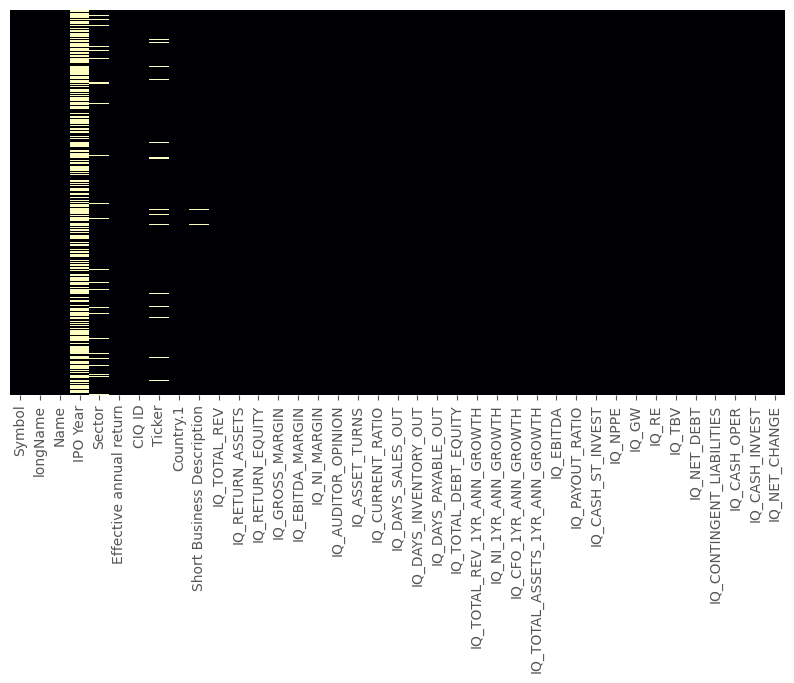

In [135]:
plt.figure(figsize=(10,5))
sns.heatmap(stockdata.isnull(),yticklabels=False,cbar=False,cmap='magma')

<AxesSubplot:>

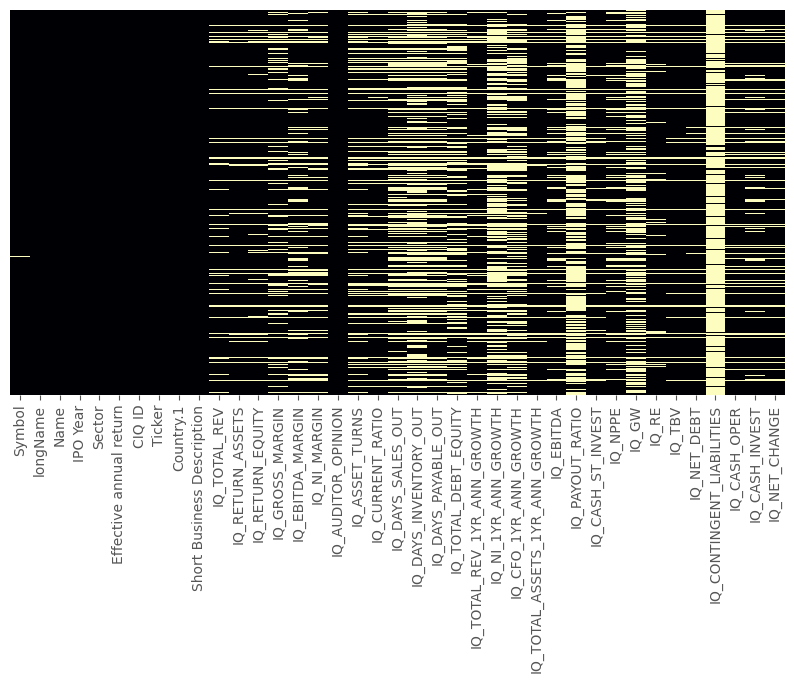

In [143]:
plt.figure(figsize=(10,5))
sns.heatmap(stockdata==0,yticklabels=False,cbar=False,cmap='magma')

In [69]:
stockdata.to_csv('cleaned stockdata.csv')